<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jesusrincon1328/blob/main/Semana%207%20/Regresi%C3%B3n_y_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad Semanal - 7**

**Alumno:** Jesús Angel Rincón Ruiz

**Matricula:** A01793960

**Objetivos:**

Entender métodos de Regresiones y K means.

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:

df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [18]:
X = df[["Number of Units"]]
y = df[["Manufacturing Cost"]]

In [19]:
len (X)

1000

In [20]:
y.describe()

,Manufacturing Cost
count,1000.000000
mean,40.052999
std,10.595322
min,20.000000
25%,32.912036
50%,38.345781
75%,44.531822
max,100.000000


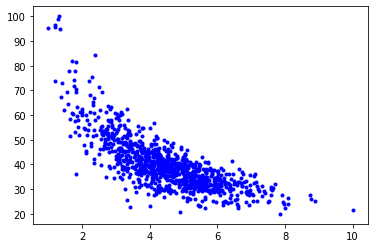

In [21]:
plt.plot(X,y, "b.")

**1.1 Divide los datos del costo de manufactura.** 

Utiliza la función train_test_split (viene el ejemplo al final del notebook)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

**1.2 Regresión Lineal.**

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada. 

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [26]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
yhat = linear_reg.predict(X_train)
yhat[0:5]

array([[34.69643698],
       [50.13122396],
       [22.74742369],
       [32.54134879],
       [36.70240901]])

In [28]:
linear_reg.intercept_

array([66.54340666])

In [29]:
linear_reg.coef_

array([[-5.92772155]])

**Modelo generado** 

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

por lo que tendriamos:

**Manufacturing Cost** =  -6.218 x **Number of units** + 67.890 

**Visualización**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


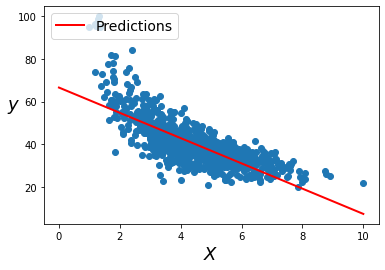

In [31]:
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

**Errores y R^2**

In [32]:
yhat_test = linear_reg.predict(X_test)
yhat_train = linear_reg.predict(X_train)

In [33]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yhat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yhat_test)))
print('r2_score',r2_score(y_test, yhat_test))


Error medio Absoluto (MAE): 5.318425867777648
Root Mean Squared Error: 7.612834453580695
r2_score 0.581323581865869


**Regresión Polinomial**

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train)


In [49]:
X_poly

array([[  5.37254819,  28.86427401, 155.07470298],
       [  2.76871688,   7.66579314,  21.22441086],
       [  7.38833337,  54.58747   , 403.31042625],
       ...,
       [  2.83492501,   8.0367998 ,  22.78372472],
       [  2.93517412,   8.61524711,  25.28725034],
       [  3.722489  ,  13.85692435,  51.58224844]])

In [50]:
lin_reg_poly = LinearRegression(fit_intercept=True)
lin_reg_poly.fit(X_poly, y_train)
lin_reg_poly.coef_, lin_reg_poly.intercept_

(array([[-31.45699559,   4.53803066,  -0.23412877]]), array([108.56609027]))

**Modelo generado** 

$\hat{y} =  -16.648X +1.145X^2 + 89.603$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


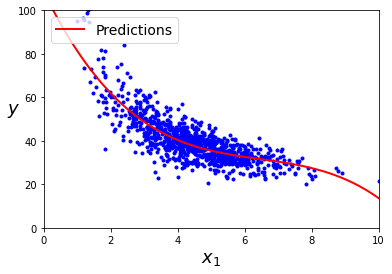

In [51]:
X_new=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg_poly.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

**Errores y R^2**